## Importing Libraries

In [8]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
!pip install seaborn
import seaborn as sns
from datetime import datetime, timedelta
!pip install statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import random
from scipy import stats
import statsmodels.api as sm
from itertools import product
# !pip install yfinance
import yfinance as yf
!pip install sktime

import warnings
warnings.filterwarnings('ignore')
!pip install pandas_datareader
import pandas_datareader as web
import datetime as dt 
import pandas_datareader.data as pdr


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/akhil/anaconda3/envs/crypto/lib/python3.6/site-packages/six-1.16.0.dist-info/METADATA'

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/akhil/anaconda3/envs/crypto/lib/python3.6/site-packages/six-1.16.0.dist-info/METADATA'

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/akhil/anaconda3/envs/crypto/lib/python3.6/site-packages/six-1.16.0.dist-info/METADATA'

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/akhil/anaconda3/envs/crypto/lib/python3.6/site-packages/six-1.16.0.dist-info/METADATA'



## Extracting Data

In [9]:
crypto_currency = 'BNB'
against_currency ='USD'
end = datetime.today()
start = dt.datetime(2020,1,1)
yf.pdr_override()
df = pdr.get_data_yahoo("BNB-USD", start, end)
target_col = 'close'
df = df.iloc[::-1]

[*********************100%***********************]  1 of 1 completed


In [10]:
df.index = pd.to_datetime(df.index)

In [11]:
differe

NameError: name 'differe' is not defined

In [ ]:
adfuller(df.Close[:-2] - df.Close[2:])

MissingDataError: exog contains inf or nans

## Data Analysis and Preparation 

In [ ]:
df_month = df.resample('M').mean()
# df.sort_index(inplace=True)

In [ ]:
df_month

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,13.952087,14.095331,13.648682,13.727642,13.727642,1.662783e+08
2020-01-31,16.142879,16.590422,15.787059,16.287440,16.287440,2.322779e+08
2020-02-29,21.886327,22.614777,21.028527,21.925773,21.925773,4.107096e+08
2020-03-31,14.311835,14.959465,13.404975,14.085149,14.085149,3.560597e+08
2020-04-30,15.050041,15.556962,14.711330,15.199917,15.199917,4.196993e+08
2020-05-31,16.612723,16.981244,16.232545,16.612913,16.612913,3.456171e+08
2020-06-30,16.625572,16.827854,16.307602,16.570955,16.570955,2.015014e+08
2020-07-31,17.642364,18.104625,17.335329,17.812052,17.812052,2.007605e+08
2020-08-31,22.454535,22.999418,21.863897,22.530665,22.530665,2.570424e+08


Checking stationarity of the given data, using ADFuller test, 
p must be less than 0.05 to discard the null hypothesis that our series is non-stationary

In [ ]:
df.rolling(3).sum()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-28,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-27,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-26,858.680969,866.030457,828.912140,836.710602,836.710602,3.057824e+09
2022-08-25,877.615143,891.544250,848.598114,858.983398,858.983398,3.146276e+09
2022-08-24,897.058411,907.652832,868.765778,877.631500,877.631500,3.119012e+09
...,...,...,...,...,...,...
2020-01-04,41.667023,43.336280,41.557796,42.960339,42.960339,6.095835e+08
2020-01-03,40.591111,42.096424,40.459193,41.662983,41.662983,5.584669e+08
2020-01-02,40.400897,41.401171,39.562620,40.578975,40.578975,5.122907e+08


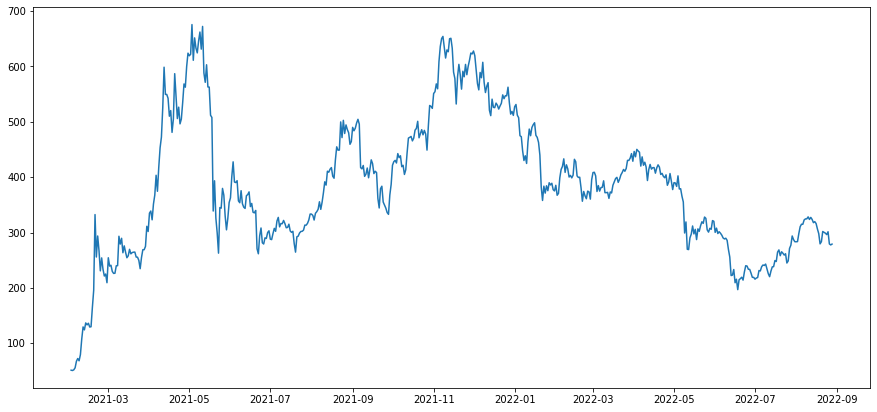

In [ ]:
plt.plot(df.loc[ :pd.to_datetime("2021-02-01")].Close)

In [12]:
adfuller(df.loc[ :pd.to_datetime("2022-01-01")].Close)[1]

0.9473020891460976

<AxesSubplot:xlabel='Date', ylabel='Close'>

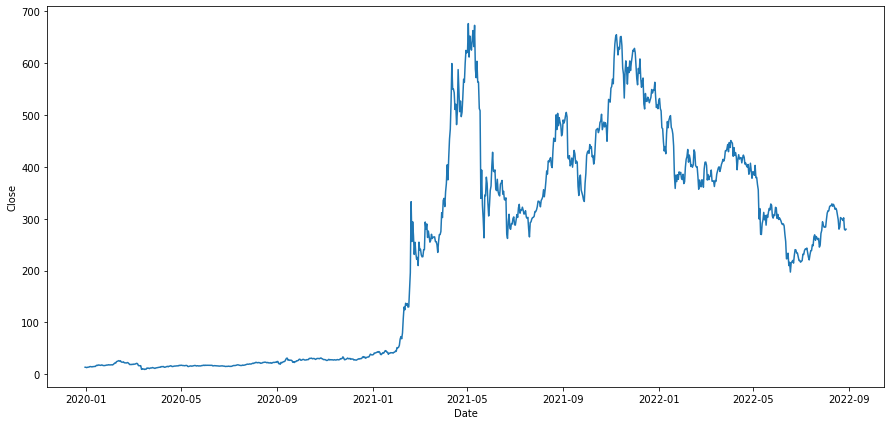

In [13]:
sns.lineplot(data=df,y="Close",x=df.index)

In [14]:
seasonal_decompose(df_month.Close, period=1).plot()
print("Dickey–Fuller test: p=%f" % adfuller((df.Close[5:]))[1])
plt.show()

NameError: name 'df_month' is not defined

p greater than 0.05, that is our series is stationary

In [15]:
# Box-Cox Transformations
df_month['close_box'], lmbda = stats.boxcox(df_month.Close)
print("Dickey–Fuller test: p=%f" % adfuller(df_month.close_box)[1])

NameError: name 'df_month' is not defined

Using Differencing method to make our non-stationary series stationary

In [195]:
df_month['close_diff']=df_month.close_box.diff(periods=0)
df_month.close_diff[1:]

Date
2020-01-31    0.0
2020-02-29    0.0
2020-03-31    0.0
2020-04-30    0.0
2020-05-31    0.0
2020-06-30    0.0
2020-07-31    0.0
2020-08-31    0.0
2020-09-30    0.0
2020-10-31    0.0
2020-11-30    0.0
2020-12-31    0.0
2021-01-31    0.0
2021-02-28    0.0
2021-03-31    0.0
2021-04-30    0.0
2021-05-31    0.0
2021-06-30    0.0
2021-07-31    0.0
2021-08-31    0.0
2021-09-30    0.0
2021-10-31    0.0
2021-11-30    0.0
2021-12-31    0.0
2022-01-31    0.0
2022-02-28    0.0
2022-03-31    0.0
2022-04-30    0.0
2022-05-31    0.0
2022-06-30    0.0
2022-07-31    0.0
2022-08-31    0.0
Freq: M, Name: close_diff, dtype: float64

p less than 0.05, now our series is stationary, and we can use ARIMA model.
ARIMA works better on stationary.

Dickey–Fuller test: p=0.626839


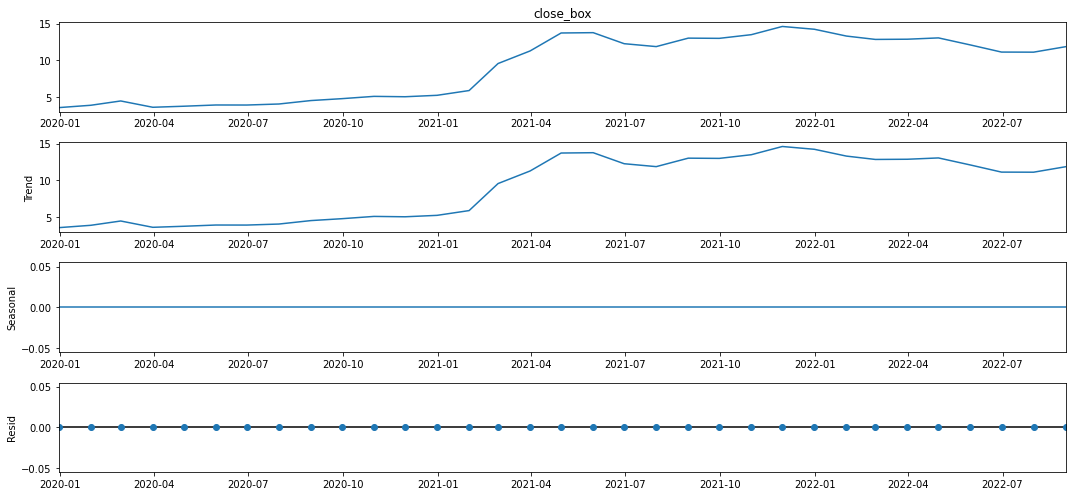

In [196]:
seasonal_decompose(df_month.close_box, period=1).plot()
print("Dickey–Fuller test: p=%f" % adfuller(df_month.close_box)[1])

## Model Development

### ARIMA Model

In [197]:
# !pip install pmdarima
from pmdarima.arima import auto_arima

In [1]:
arima_model = auto_arima(df1['y'][-240:-120],start_p=1,start_q=2,start_d=1,start_P=2,start_Q=3,start_D=1,
                      max_p=10, max_q=10, # maximum p and q
                      m=36,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      stationarity=False, # No Stationarity
                      D=3, 
                      trace=True,
                      error_action='ignore',  
                      n_jobs=4,   # Use all available CPUs
                      suppress_warnings=True, 
                      out_of_sample_size=10,
                      maxiter=-1,
                      stepwise=True).fit(df1['y'][-240:-120])

NameError: name 'auto_arima' is not defined

In [228]:
pred = pd.Series(arima_model.predict(n_periods=120))
pred.columns = ['close']

[]

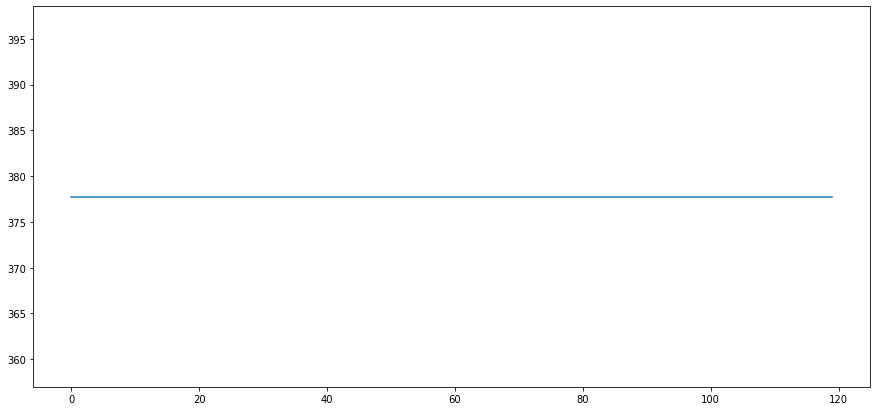

In [229]:
plt.plot(pred[:])
plt.plot()


[]

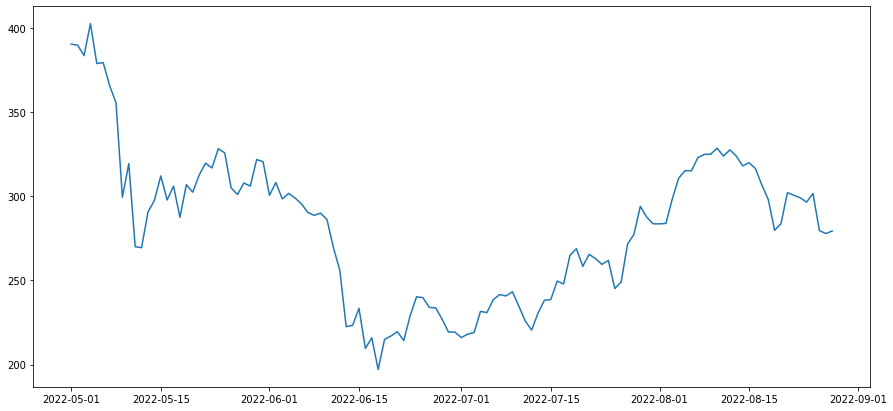

In [223]:
plt.plot(df1['y'][-120:])
plt.plot()

In [206]:
print(df_month.Close.tail())
pred.head()

Date
2022-04-30    415.605955
2022-05-31    324.777569
2022-06-30    249.748236
2022-07-31    248.866326
2022-08-31    305.065866
Freq: M, Name: Close, dtype: float64


0    277.804933
1    277.187594
2    280.234539
3    278.917000
4    279.379615
dtype: float64

plt.plot(pred)
plt.plot()

### FB Prophet Model 

In [16]:
import fbprophet
from matplotlib import pyplot
from fbprophet import Prophet

In [17]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-28,277.553131,280.624359,276.516113,279.701904,279.701904,857992704
2022-08-27,279.571838,283.850098,274.544373,277.801575,277.801575,962669292
2022-08-26,301.556000,301.556000,277.851654,279.598175,279.598175,1210077085
2022-08-25,296.487305,306.138153,296.202087,301.583649,301.583649,973529233
2022-08-24,299.015106,299.958679,294.712036,296.449677,296.449677,935405757
...,...,...,...,...,...,...
2020-01-04,13.667442,13.921914,13.560008,13.891512,13.891512,182230374
2020-01-03,13.035329,13.763709,13.012638,13.660452,13.660452,173683857
2020-01-02,13.698126,13.715548,12.989974,13.027011,13.027011,156376427


In [18]:
df['Date']=df.index
df1 = df[['Date','Close']]
df1.columns =['ds','y']
df1['ds'] = pd.to_datetime(df1['ds'])

In [19]:
df1 = df1[::-1]

In [20]:
import holidays
holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=[2019,2020,2021,2022]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday.head

<bound method NDFrame.head of            ds      holiday
0  2019-01-01  US-Holidays
1  2019-01-21  US-Holidays
2  2019-02-18  US-Holidays
3  2019-05-27  US-Holidays
4  2019-07-04  US-Holidays
5  2019-09-02  US-Holidays
6  2019-10-14  US-Holidays
7  2019-11-11  US-Holidays
8  2019-11-28  US-Holidays
9  2019-12-25  US-Holidays
10 2020-01-01  US-Holidays
11 2020-01-20  US-Holidays
12 2020-02-17  US-Holidays
13 2020-05-25  US-Holidays
14 2020-07-03  US-Holidays
15 2020-07-04  US-Holidays
16 2020-09-07  US-Holidays
17 2020-10-12  US-Holidays
18 2020-11-11  US-Holidays
19 2020-11-26  US-Holidays
20 2020-12-25  US-Holidays
21 2021-01-01  US-Holidays
22 2021-01-18  US-Holidays
23 2021-02-15  US-Holidays
24 2021-05-31  US-Holidays
25 2021-06-18  US-Holidays
26 2021-06-19  US-Holidays
27 2021-07-04  US-Holidays
28 2021-07-05  US-Holidays
29 2021-09-06  US-Holidays
30 2021-10-11  US-Holidays
31 2021-11-11  US-Holidays
32 2021-11-25  US-Holidays
33 2021-12-24  US-Holidays
34 2021-12-25  US-Holiday

In [21]:
model = Prophet(holidays=holiday)
model.fit(df1[:920])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
# future = list()
# date = datetime(2022,06,18)
# for i in range(1, 30):
#   date += timedelta(days=1)
#   future.append([date])
# future = DataFrame(future)
# future.columns = ['ds']
# future['ds']= pd.to_datetime(future['ds'])

In [23]:
df2 = pd.DataFrame(df1['ds'][850:])

In [24]:
len(df1)

972

In [25]:
future = model.make_future_dataframe(periods=57, freq='D')
forecast = model.predict(future)

In [26]:
forecast = model.predict(df2)

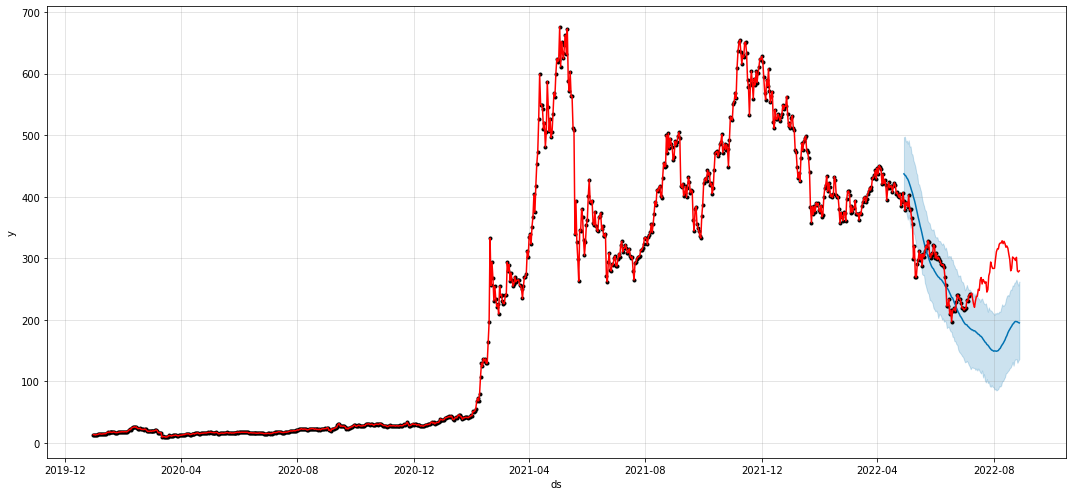

In [27]:
fig,axs=plt.subplots(1,1)
model.plot(forecast,ax=axs)
plt.plot(df["Close"],color='r')

In [28]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [29]:
def rmse(y_true, y_pred):
	return np.sqrt(np.mean(np.square(y_pred - y_true)))

In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
strt='2022-04-28'
end='2022-06-24'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
X_tr=df1[:850]

In [166]:
strt='2022-04-28'
end='2022-06-24'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
X_tr=df1[:850]
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         holidays=holiday, 
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='US')
    train_model.fit(X_tr)
    train_forecast = train_model.make_future_dataframe(periods=57, freq='D',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    # print(test)
    Actual = df1[(df1['ds']>strt) & (df1['ds']<=end)]
    MAPE = rmse(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ nan
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ nan
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ nan
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


KeyboardInterrupt: 

In [36]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()
parameters['Parameters'][0]


KeyError: 0

In [37]:
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.1,
                      holidays_prior_scale = 0.3,
                      n_changepoints = 100,
                      seasonality_mode = 'additive',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.add_country_holidays(country_name='US')
final_model.fit(X_tr)

In [38]:
futu=final_model.predict(df2)

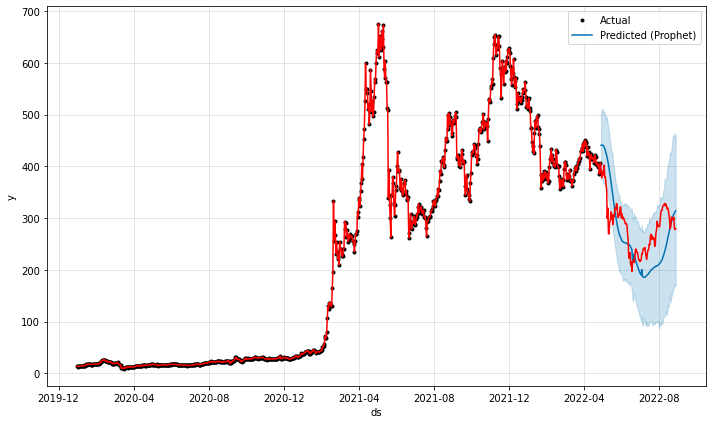

In [56]:
final_model.plot(futu)
plt.plot(df["Close"],color='r')
plt.legend(['Actual','Predicted (Prophet)'])

In [50]:
rmse(np.array(futu['yhat']),np.array(df1['y'][-122:]))

54.7553300201337

In [49]:
df1['y'][-122:]

Date
2022-04-29    393.062164
2022-04-30    377.767822
2022-05-01    390.281982
2022-05-02    389.670654
2022-05-03    383.475800
                 ...    
2022-08-24    296.449677
2022-08-25    301.583649
2022-08-26    279.598175
2022-08-27    277.801575
2022-08-28    279.701904
Name: y, Length: 122, dtype: float64

In [48]:
len(futu)

122